In [8]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics
from keras import layers
from keras import models
from keras.utils import to_categorical

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

In [31]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [32]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype("float32") / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype("float32") / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(64, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 dropout_4 (Dropout)         (None, 3, 3, 64)         

In [36]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=50,
    batch_size=312,
    validation_data=(x_val, y_val)
)
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=100,
    validation_data=(x_val, y_val)
)

Epoch 1/10
500/500 [==============================] - 4s 8ms/step - loss: 0.1218 - accuracy: 0.9547 - val_loss: 0.2617 - val_accuracy: 0.9156
Epoch 2/10
500/500 [==============================] - 3s 6ms/step - loss: 0.1214 - accuracy: 0.9549 - val_loss: 0.2544 - val_accuracy: 0.9159
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 0.1178 - accuracy: 0.9566 - val_loss: 0.2590 - val_accuracy: 0.9192
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 0.1172 - accuracy: 0.9570 - val_loss: 0.2689 - val_accuracy: 0.9137
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 0.1153 - accuracy: 0.9571 - val_loss: 0.2649 - val_accuracy: 0.9167
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 0.1103 - accuracy: 0.9595 - val_loss: 0.2659 - val_accuracy: 0.9173
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 0.1071 - accuracy: 0.9601 - val_loss: 0.2879 - val_accuracy: 0.9158
Epoch 

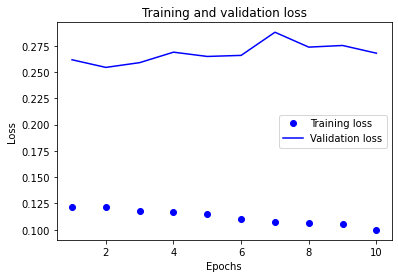

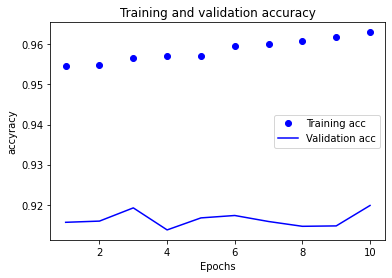

In [38]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accyracy')
plt.legend()

In [37]:
# y_test = to_categorical(y_test, dtype ="uint8")
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.2767 - accuracy: 0.9196
[0.2767298221588135, 0.9196000099182129]


In [39]:
print([x for x in (enumerate(history.history["val_accuracy"])) if x[1] == max(history.history["val_accuracy"])])
print([x for x in (enumerate(history.history["val_loss"])) if x[1] == min(history.history["val_loss"])])

[(9, 0.9197999835014343)]
[(1, 0.25443267822265625)]
